In [187]:
import numpy as np
from scipy.ndimage import filters
from PIL import Image
import imutils
import matplotlib.pylab as plt
from Get_Harris_Interesting_Points import Harris_Matrix, Get_Harris_Points
from Generate_Match_Descriptors import Vectors_Descriptors, Match_Descriptors
from RANSAC_and_Image_Append import RANSAC, Append_Images
from Plot_Harris_Points_and_Match_Pairs import Plot_Harris_Interest_Points, Plot_Matches

Rotating angle:  6


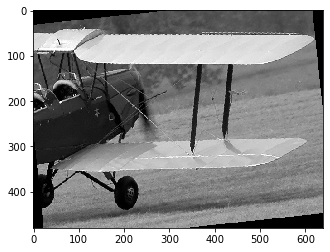

Scaling multiplier:  0.8


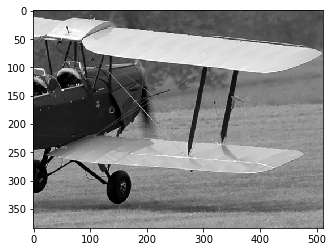

Original image: 


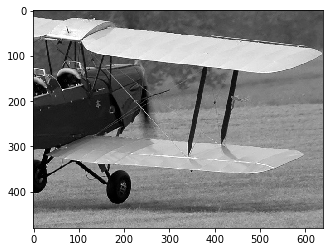

In [236]:
# Investigation for scalar and rotation
Image1 = Image.open('image-pairs/tigermoth1.png').convert('L')
Image2 = Image.open('image-pairs/tigermoth2.png').convert('L')

# Roaate
rotates = 6
print("Rotating angle: ", rotates)
RotateImage2 = Image2.rotate(rotates)
RotateImage2 = np.array(RotateImage2, dtype=np.float32)
#print(RotateImage2.shape)
imutils.imshow(RotateImage2)

# Scalar
#ScalarImage2 = Image2.HAMMING
scalar = 0.8
print("Scaling multiplier: ", scalar)
W, H = Image2.size
ScalarImage2 = Image2.resize((int(W*scalar), int(H*scalar)))
ScalarImage2 = np.array(ScalarImage2, dtype=np.float32)

imutils.imshow(ScalarImage2)
print("Original image: ")
Image_array = np.array(Image2, dtype=np.float32)
imutils.imshow(Image_array)

Images shown:


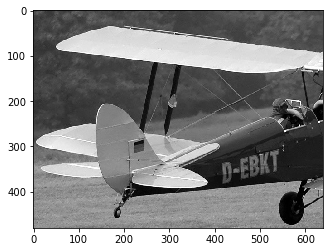

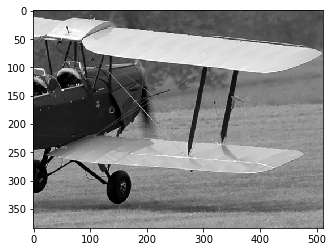

Harris interesting points:
Shown printing Harris interesting points:


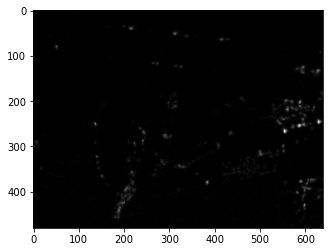

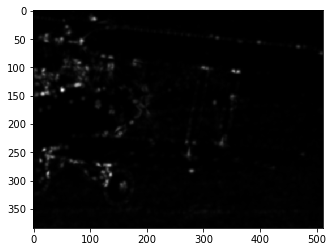

Getting Interest Points for both images
Found 79 interest points in image 1.
Found 86 interest points in image 2.


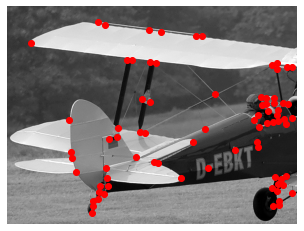

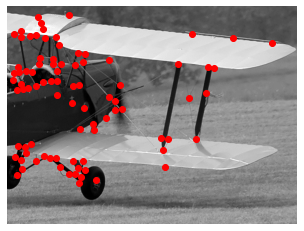

In [237]:
np.seterr(divide='ignore', invalid='ignore')

# Reading Images from memory.           
harrisImage1 = (np.array(Image.open('image-pairs/tigermoth1.png').convert('L'), dtype=np.float32))
harrisImage2 = (np.array(Image.open('image-pairs/tigermoth2.png').convert('L'), dtype=np.float32))

# Rotate and Scalar
#harrisImage2 = RotateImage2
harrisImage2 = ScalarImage2

# Shown the images in memeory.
print("Images shown:")
imutils.imshow(harrisImage1)
imutils.imshow(harrisImage2)

# Use the threshold to generate filter and store the bright points 
print("Harris interesting points:")
image1 = Harris_Matrix(harrisImage1, 2)
image2 = Harris_Matrix(harrisImage2, 2)

# Show the gray interesting points
print("Shown printing Harris interesting points:")
imutils.imshow(image1)
imutils.imshow(image2)

# Make the bright points into red
print("Getting Interest Points for both images")
interestPoints1 = Get_Harris_Points(image1)
interestPoints2 = Get_Harris_Points(image2)

# Use the interesting points length to get the points number 
print("Found " + str(len(interestPoints1)) +  " interest points in image 1.")
print("Found " + str(len(interestPoints2)) +  " interest points in image 2.")

# Show the red interesting points in images
Plot_Harris_Interest_Points(harrisImage1, interestPoints1)
Plot_Harris_Interest_Points(harrisImage2, interestPoints2)

Maximum of Image1: 0.54206336
Maximum of Image2: 0.55440456
Maximum of Dot Product: 0.9740692

Response matrix before and after thresholding: 


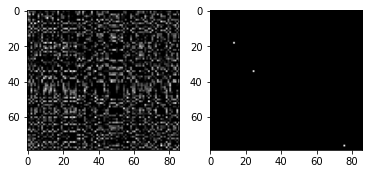


Plot the matches between the two images:


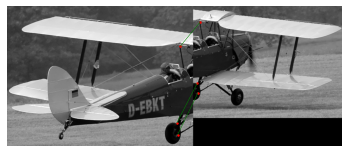

In [238]:
# Use to get Normalised Image Patches (Image Descriptors) for both images
descriptors1 = Vectors_Descriptors(harrisImage1, interestPoints1)
descriptors2 = Vectors_Descriptors(harrisImage2, interestPoints2)

# Use to matches between Descriptors
Maxvalue_image1, Maxvalue_image2, Max_dotproduct, Original_matrix, Thresholded_matrix, Pairs_list = Match_Descriptors(descriptors1, descriptors2)
# Output the maximum value of images
print("Maximum of Image1: " + str(Maxvalue_image1))
print("Maximum of Image2: " + str(Maxvalue_image2))
print("Maximum of Dot Product: " + str(Max_dotproduct))

# Print the response matrix binary image
print("\nResponse matrix before and after thresholding: ")
plt.subplot(121)
plt.imshow(Original_matrix)
plt.subplot(122)
plt.plot([0,])
plt.imshow(Thresholded_matrix)
plt.show()

# Output the match image
print("\nPlot the matches between the two images:")
result = Plot_Matches(harrisImage1, harrisImage2, interestPoints1, interestPoints2, Pairs_list)

Number of agreements (best match count): 1.0
Row offset: 144.0
Column offset: 570.0
Final Image Reconstruction:


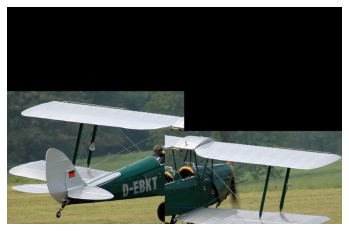

In [239]:
# Output the images aligmnet
# Use RANSAC to clean the noise
rowOffset, columnOffset, bestMatches = RANSAC(Pairs_list, interestPoints1, interestPoints2)
print('Number of agreements (best match count): ' + str(bestMatches))
print('Row offset: ' + str(rowOffset))
print('Column offset: ' + str(columnOffset))

print("Final Image Reconstruction:")
colourImage1 = Image.open('image-pairs/tigermoth1.png')
colourImage2 = Image.open('image-pairs/tigermoth2.png')
final = Append_Images(colourImage1, colourImage2, rowOffset, columnOffset)